In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc



In [3]:
transcriptome = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_tpm_normalized.csv",
    index_col=0,
)
rows_to_drop_expression_data = [
    "A2450525897_n01_undetermined",
    "A2449446903_n01_undetermined",
    "B250508004_n01_undetermined",
    "B2449500127_n01_undetermined",
]
transcriptome = transcriptome.drop(index=rows_to_drop_expression_data)
transcriptome = transcriptome.sort_index()

metadata = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Plates_1_to_4_metadata_merged_luke.csv",
    index_col=0,
)
metadata = metadata.drop(
    columns=[
        "arb.sort",
        "sample-id",
        "Ambiguous Unstranded",
        "Ambiguous Forward",
        "Multimapping",
        "Unmapped Over Mapped",
    ]
)
metadata["Date and Time"] = metadata["date"] + " " + metadata["time"]
luke_time_data_format = "%-m/%-d/%y %-H:%-M"
metadata["Date and Time"] = pd.to_datetime(
    metadata["Date and Time"], format=luke_time_data_format
)

unusable_samples = [
    "A2450525897_n01_LICRNA01_A06",
    "A2450525897_n01_LICRNA01_A08",
    "A2450525897_n01_LICRNA01_C11",
    "A2450525897_n01_LICRNA01_D11",
    "A2450525897_n01_LICRNA01_D12",
    "A2449446903_n01_LICRNA02_F01",
    "B2449500127_n01_LICRNA04_A04",
    "B2449500127_n01_LICRNA04_A06",
    "B2449500127_n01_LICRNA04_A07",
]
borderline_unusable = [
    "A2450525897_n01_LICRNA01_F03",
    "A2450525897_n01_LICRNA01_G07",
    "A2449446903_n01_LICRNA02_A04",
    "A2449446903_n01_LICRNA02_H10",
    "B2449500127_n01_LICRNA04_H02",
    "B2449500127_n01_LICRNA04_H11",
]
all_unsable = borderline_unusable + unusable_samples

trimmed_transcriptome = transcriptome.drop(index=all_unsable)
trimmed_metadata = metadata.drop(index=all_unsable)
trimmed_metadata = trimmed_metadata.sort_index()
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=0)
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=1)

In [4]:
microbiome_abundance = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/Microbiome/lic2024_16S_rab.csv"
)
long_term_microbiome = microbiome_abundance.merge(
    metadata[["sampID", "Experiment Type"]], left_on="plantID", right_on="sampID"
)
long_term_microbiome

,Sample,sample.type,timepoint,date,time,platename,daysincestart,plantID,Kingdom,Phylum,Class,Order,Family,Genus,Species,AbundR100,sampID,Experiment Type
0,LIC522,plant,c1_t11,2/11/24,12:00,LICCIRC_02,102,LIC522,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales_A_650611,Pseudomonadaceae,Pseudomonas_E_647464,Pseudomonas_E_647464 viridiflava,79.1,LIC522,Circadian Experiment 1
1,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,66.1,LIC063,Long Term
2,LIC159,plant,t14,1/23/24,8:00,LIC_02,83,LIC159,d__Bacteria,Cyanobacteriota,Cyanobacteriia,Cyanobacteriales,Coleofasciculaceae,Caldora,Caldora sp010672925,60.5,LIC159,Long Term
3,LIC452,plant,c1_t06,2/10/24,16:00,LICCIRC_01,101,LIC452,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae_A_595421,Massilia_574544,Massilia atriviolacea,59.8,LIC452,Circadian Experiment 1
4,LIC306,plant,t26,3/8/24,8:00,LIC_04,128,LIC306,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,57.2,LIC306,Long Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12281,LIC122,plant,t11,12/15/23,8:00,LIC_02,44,LIC122,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Nocardioidaceae,Nocardioides_A_392796,Nocardioides_A_392796 hankookensis,0.5,LIC122,Long Term
12282,LIC028,plant,t03,11/14/23,8:00,LIC_01,13,LIC028,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Geodermatophilaceae,Modestobacter,Modestobacter muralis,0.5,LIC028,Long Term
12283,LIC631,plant,c2_t05,3/2/24,12:00,LICCIRC_03,122,LIC631,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Brevundimonas,Brevundimonas subvibrioides,0.5,LIC631,Circadian Experiment 2
12284,LIC629,plant,c2_t05,3/2/24,12:00,LICCIRC_03,122,LIC629,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Rhizobiales_505101,Rhizobiaceae,Agrobacterium,Agrobacterium larrymoorei,0.5,LIC629,Circadian Experiment 2


In [5]:
genus_sum = (
    long_term_microbiome[["Sample", "Genus", "AbundR100"]]
    .groupby(["Sample", "Genus"])
    .sum()
)
genus_sum = genus_sum.reset_index()
genus_sum_w_tp = genus_sum.merge(
    metadata[["sampID", "timepoint"]], left_on="Sample", right_on="sampID"
)
all_present_genus = genus_sum_w_tp["Genus"].unique()

## Need to fill in missing genus in every sample first
for sampID in genus_sum_w_tp["sampID"].unique():
    sampid_only_df = genus_sum_w_tp.loc[genus_sum_w_tp["sampID"] == sampID]
    present_genus_in_samp = sampid_only_df["Genus"].unique()
    difference_in_present_bacteria = list(
        set(all_present_genus) - set(present_genus_in_samp)
    )
    current_time_point = sampid_only_df["timepoint"].iloc[0]
    empty_df_to_add = pd.DataFrame(
        columns=["Sample", "Genus", "AbundR100", "sampID", "timepoint"]
    )
    empty_df_to_add["Genus"] = difference_in_present_bacteria
    empty_df_to_add["Sample"] = sampID
    empty_df_to_add["AbundR100"] = 0
    empty_df_to_add["sampID"] = sampID
    empty_df_to_add["timepoint"] = current_time_point
    genus_sum_w_tp = pd.concat([genus_sum_w_tp, empty_df_to_add])

In [6]:
genus_sum_w_tp

,Sample,Genus,AbundR100,sampID,timepoint
0,LIC001,Actinomycetospora,0.6,LIC001,t01
1,LIC001,Actinoplanes,1.1,LIC001,t01
2,LIC001,Aeromicrobium,0.8,LIC001,t01
3,LIC001,Blastococcus,1.7,LIC001,t01
4,LIC001,Caulobacter_487784,0.5,LIC001,t01
...,...,...,...,...,...
123,LIC644,Roseomonas_507234,0.0,LIC644,c2_t06
124,LIC644,Streptomyces_400150,0.0,LIC644,c2_t06
125,LIC644,Pseudorhodoferax,0.0,LIC644,c2_t06
126,LIC644,Paraburkholderia_580243,0.0,LIC644,c2_t06


In [7]:
for genus in genus_sum_w_tp["Genus"].unique():
    genus_df = genus_sum_w_tp.loc[
        genus_sum_w_tp["Genus"] == genus
    ]
    if sum(genus_df["AbundR100"] > 0) < 8:
        genus_sum_w_tp = genus_sum_w_tp.loc[
            genus_sum_w_tp["Genus"] != genus
        ]

In [8]:
genus_sum_w_tp

,Sample,Genus,AbundR100,sampID,timepoint
0,LIC001,Actinomycetospora,0.6,LIC001,t01
1,LIC001,Actinoplanes,1.1,LIC001,t01
2,LIC001,Aeromicrobium,0.8,LIC001,t01
3,LIC001,Blastococcus,1.7,LIC001,t01
4,LIC001,Caulobacter_487784,0.5,LIC001,t01
...,...,...,...,...,...
105,LIC644,Pseudomonas_M,0.0,LIC644,c2_t06
119,LIC644,Caldora,0.0,LIC644,c2_t06
121,LIC644,Nakamurella,0.0,LIC644,c2_t06
122,LIC644,Aureimonas_A_501548,0.0,LIC644,c2_t06


In [9]:
timepoint_abundance_matrix = pd.pivot_table(
    genus_sum_w_tp,
    values="AbundR100",
    index="timepoint",
    columns="Genus",
)
timepoint_abundance_matrix

Genus,Actinomycetospora,Actinoplanes,Aeromicrobium,Aetherobacter,Agreia,Agrobacterium,Amnibacterium_382409,Aquabacterium_A_592457,Aureimonas_A_501548,Aureimonas_A_501549,...,Rathayibacter,Rhizobium_C_501058,Rhodoferax_C,Rugamonas_570800,Solirubrobacter,Sphingomonas_L_486704,Sphingomonas_R_483406,Telluria_573210,UBA1952,Variovorax
timepoint,,,,,,,,,,,,,,,,,,,,,
c1_t01,0.375000,0.412500,0.1250,0.062500,0.0000,0.800000,0.000000,0.000000,0.0000,0.062500,...,0.150000,0.000000,3.800000,0.075000,0.100000,18.012500,0.0000,1.687500,0.100000,3.512500
c1_t02,0.312500,0.212500,0.2000,0.212500,0.0000,1.787500,0.075000,0.000000,0.0000,0.412500,...,0.075000,0.062500,5.137500,0.062500,0.062500,20.775000,0.0000,1.000000,0.000000,2.187500
c1_t03,0.062500,0.137500,0.0000,0.000000,0.0000,0.562500,0.000000,0.000000,0.0000,0.475000,...,0.075000,0.000000,6.762500,1.662500,0.000000,23.612500,0.0000,1.025000,0.075000,2.962500
c1_t04,0.000000,0.000000,0.0000,0.112500,0.0750,0.775000,0.000000,0.000000,0.0000,0.312500,...,0.262500,0.100000,4.075000,0.100000,0.000000,22.312500,0.0000,0.612500,0.000000,2.375000
c1_t05,0.100000,0.737500,0.1875,0.200000,0.0000,1.262500,0.000000,0.075000,0.0000,0.537500,...,0.075000,0.000000,4.987500,0.000000,0.000000,24.012500,0.0000,0.862500,0.062500,3.862500
c1_t06,0.000000,0.225000,0.0000,0.312500,0.0000,0.300000,0.000000,0.000000,0.0000,0.287500,...,0.350000,0.062500,4.587500,0.400000,0.000000,20.175000,0.1375,2.287500,0.000000,1.812500
c1_t07,0.337500,0.612500,0.0000,0.912500,0.0000,1.612500,0.000000,0.062500,0.0000,0.175000,...,0.212500,0.000000,6.400000,0.300000,0.062500,20.912500,0.0000,1.112500,0.062500,3.650000
c1_t08,1.400000,3.120000,1.2000,1.333333,0.0000,3.285714,0.000000,0.000000,0.0000,0.945455,...,0.488889,0.000000,9.250000,0.000000,0.444444,49.950000,0.0000,3.054545,0.000000,6.375000
c1_t09,0.412500,0.262500,0.0000,0.925000,0.0000,0.275000,0.125000,0.000000,0.0000,1.137500,...,0.125000,0.000000,3.400000,0.475000,0.000000,34.862500,0.0000,1.325000,0.000000,2.925000


In [10]:
bacteria_correlation = timepoint_abundance_matrix.corr(method="spearman")

In [11]:
reversed_bacteria_correlation = 1 - bacteria_correlation
reversed_bacteria_correlation

Genus,Actinomycetospora,Actinoplanes,Aeromicrobium,Aetherobacter,Agreia,Agrobacterium,Amnibacterium_382409,Aquabacterium_A_592457,Aureimonas_A_501548,Aureimonas_A_501549,...,Rathayibacter,Rhizobium_C_501058,Rhodoferax_C,Rugamonas_570800,Solirubrobacter,Sphingomonas_L_486704,Sphingomonas_R_483406,Telluria_573210,UBA1952,Variovorax
Genus,,,,,,,,,,,,,,,,,,,,,
Actinomycetospora,0.000000,0.791858,0.667945,0.940989,1.037046,1.123499,0.733309,0.981075,0.966407,0.933723,...,0.949917,0.992107,0.966750,1.063991,0.722807,0.886445,1.289299,0.810402,1.203246,1.209672
Actinoplanes,0.791858,0.000000,0.821910,0.760953,1.117932,0.835860,0.970636,0.691580,1.062016,0.868958,...,1.027012,0.825336,0.904376,1.346535,0.678634,0.962283,0.912580,0.836212,1.070445,0.652136
Aeromicrobium,0.667945,0.821910,0.000000,1.164926,1.104694,1.024043,0.862389,0.876951,0.732953,0.985770,...,1.007655,0.744942,0.871856,1.185722,0.748565,1.020483,1.154198,0.814713,1.191017,1.042035
Aetherobacter,0.940989,0.760953,1.164926,0.000000,0.880902,0.793257,1.485447,1.121580,1.283231,0.744393,...,0.967344,1.464219,0.757484,1.438974,1.108596,0.651853,0.892347,1.128562,0.991789,0.452339
Agreia,1.037046,1.117932,1.104694,0.880902,0.000000,0.968418,0.946816,1.220184,1.187671,0.918198,...,0.979842,1.140753,0.998145,1.098900,1.076932,0.884996,1.033513,1.162720,0.985564,0.828103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sphingomonas_L_486704,0.886445,0.962283,1.020483,0.651853,0.884996,1.054185,1.130771,1.095885,1.138440,0.740502,...,0.985705,1.207517,1.028158,1.367258,0.986995,0.000000,0.819832,0.999422,1.074333,0.785475
Sphingomonas_R_483406,1.289299,0.912580,1.154198,0.892347,1.033513,1.239667,1.175424,1.039781,1.040618,1.011484,...,0.819473,1.130056,0.924479,0.903394,1.098285,0.819832,0.000000,0.931846,1.075808,0.978621
Telluria_573210,0.810402,0.836212,0.814713,1.128562,1.162720,1.034123,1.003729,1.054825,0.829241,1.206986,...,0.749342,0.837514,1.037356,0.891981,0.773887,0.999422,0.931846,0.000000,0.885238,1.146802


In [12]:
linkage = hc.linkage(sp.distance.squareform(reversed_bacteria_correlation), method = 'average')


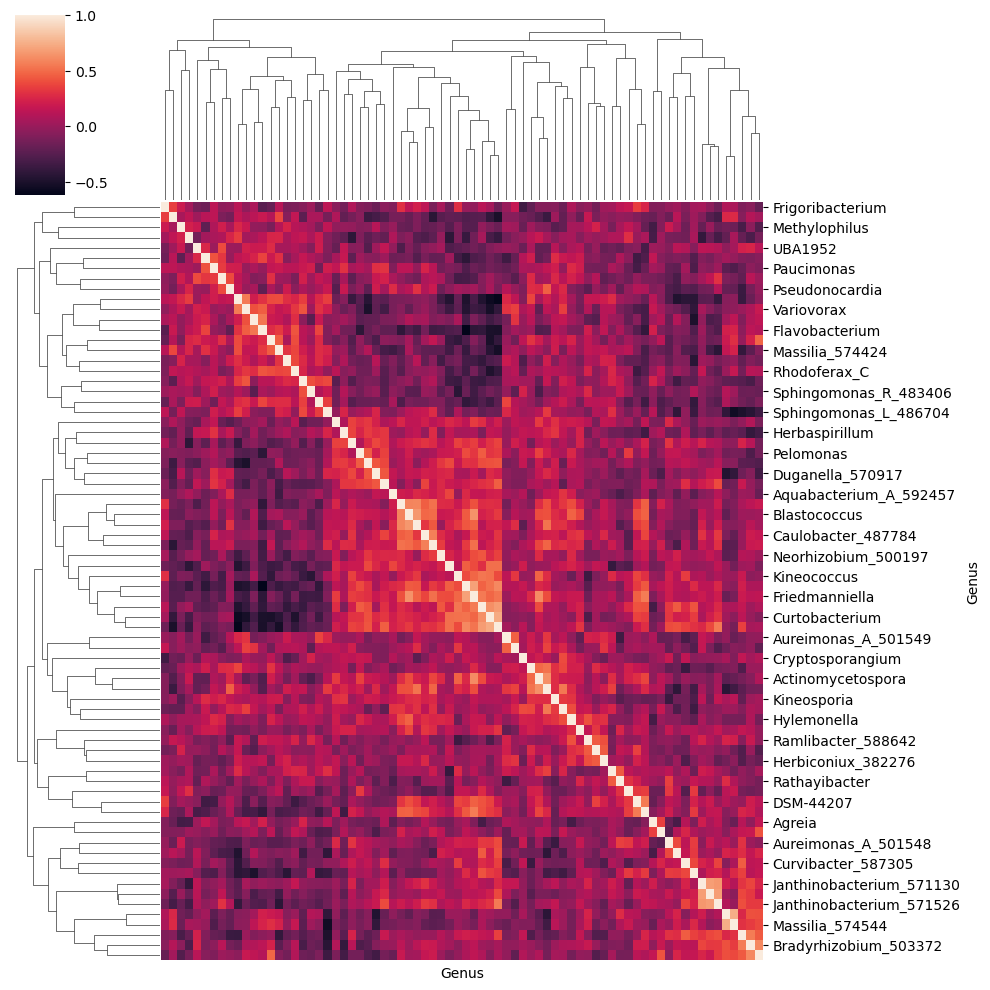

In [13]:
fig = sns.clustermap(bacteria_correlation, row_linkage=linkage, col_linkage= linkage ,xticklabels = False,)
cluster_order = fig.dendrogram_row.reordered_ind

In [14]:
cluster_order =  bacteria_correlation.iloc[cluster_order].index.tolist()

reorder_bacteria_correlation = bacteria_correlation.reindex(cluster_order)
reorder_bacteria_correlation = reorder_bacteria_correlation[cluster_order]
reorder_bacteria_correlation

Genus,Frigoribacterium,Pseudomonas_E_647464,Methylophilus,Patulibacter,UBA1952,Herminiimonas_567389,Paucimonas,Methylotenera_A_557637,Pseudonocardia,Aetherobacter,...,Curvibacter_587305,Rugamonas_570800,Janthinobacterium_571130,Duganella_570715,Janthinobacterium_571526,Massilia_573596,Massilia_574544,Pseudomonas_M,Bradyrhizobium_503372,Caldora
Genus,,,,,,,,,,,,,,,,,,,,,
Frigoribacterium,1.000000,0.346401,0.187151,0.038493,-0.128210,-0.158874,0.130376,-0.041046,-0.017466,0.125752,...,-0.077376,0.040250,0.051672,-0.045476,-0.158385,0.086649,0.060426,-0.093120,-0.055113,-0.187717
Pseudomonas_E_647464,0.346401,1.000000,0.057483,0.144056,0.026577,0.122352,0.135273,-0.103741,-0.138805,0.154986,...,-0.110480,0.021067,-0.083401,-0.252905,-0.324266,0.261232,0.271755,-0.069358,0.097534,0.034752
Methylophilus,0.187151,0.057483,1.000000,0.226196,0.181161,-0.223571,0.082800,0.216512,0.064528,0.256844,...,-0.156700,0.033473,-0.190090,-0.000307,-0.185927,-0.146944,-0.167451,-0.303558,-0.053894,-0.266928
Patulibacter,0.038493,0.144056,0.226196,1.000000,-0.138107,0.034856,0.060215,0.087518,0.245452,0.340917,...,-0.149024,0.059039,-0.396260,-0.180953,-0.324751,-0.204155,0.057168,-0.187977,-0.290108,-0.130113
UBA1952,-0.128210,0.026577,0.181161,-0.138107,1.000000,0.259431,0.010078,0.389611,0.009131,0.008211,...,0.091098,-0.072495,0.136677,0.127927,0.095880,-0.037547,0.041007,0.225039,0.244529,0.121522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Massilia_573596,0.086649,0.261232,-0.146944,-0.204155,-0.037547,0.038442,-0.225264,-0.104635,-0.190147,-0.062424,...,-0.067472,0.102061,0.199734,0.027532,0.095590,1.000000,0.741587,0.255603,0.406768,0.400605
Massilia_574544,0.060426,0.271755,-0.167451,0.057168,0.041007,-0.013103,-0.280514,-0.130249,-0.194157,-0.046155,...,0.068508,0.261697,0.098795,-0.051047,-0.001456,0.741587,1.000000,0.301393,0.339737,0.383550
Pseudomonas_M,-0.093120,-0.069358,-0.303558,-0.187977,0.225039,-0.083269,-0.189031,-0.214586,-0.366567,-0.373892,...,0.446919,0.357845,0.313292,0.379974,0.405236,0.255603,0.301393,1.000000,0.553406,0.443190


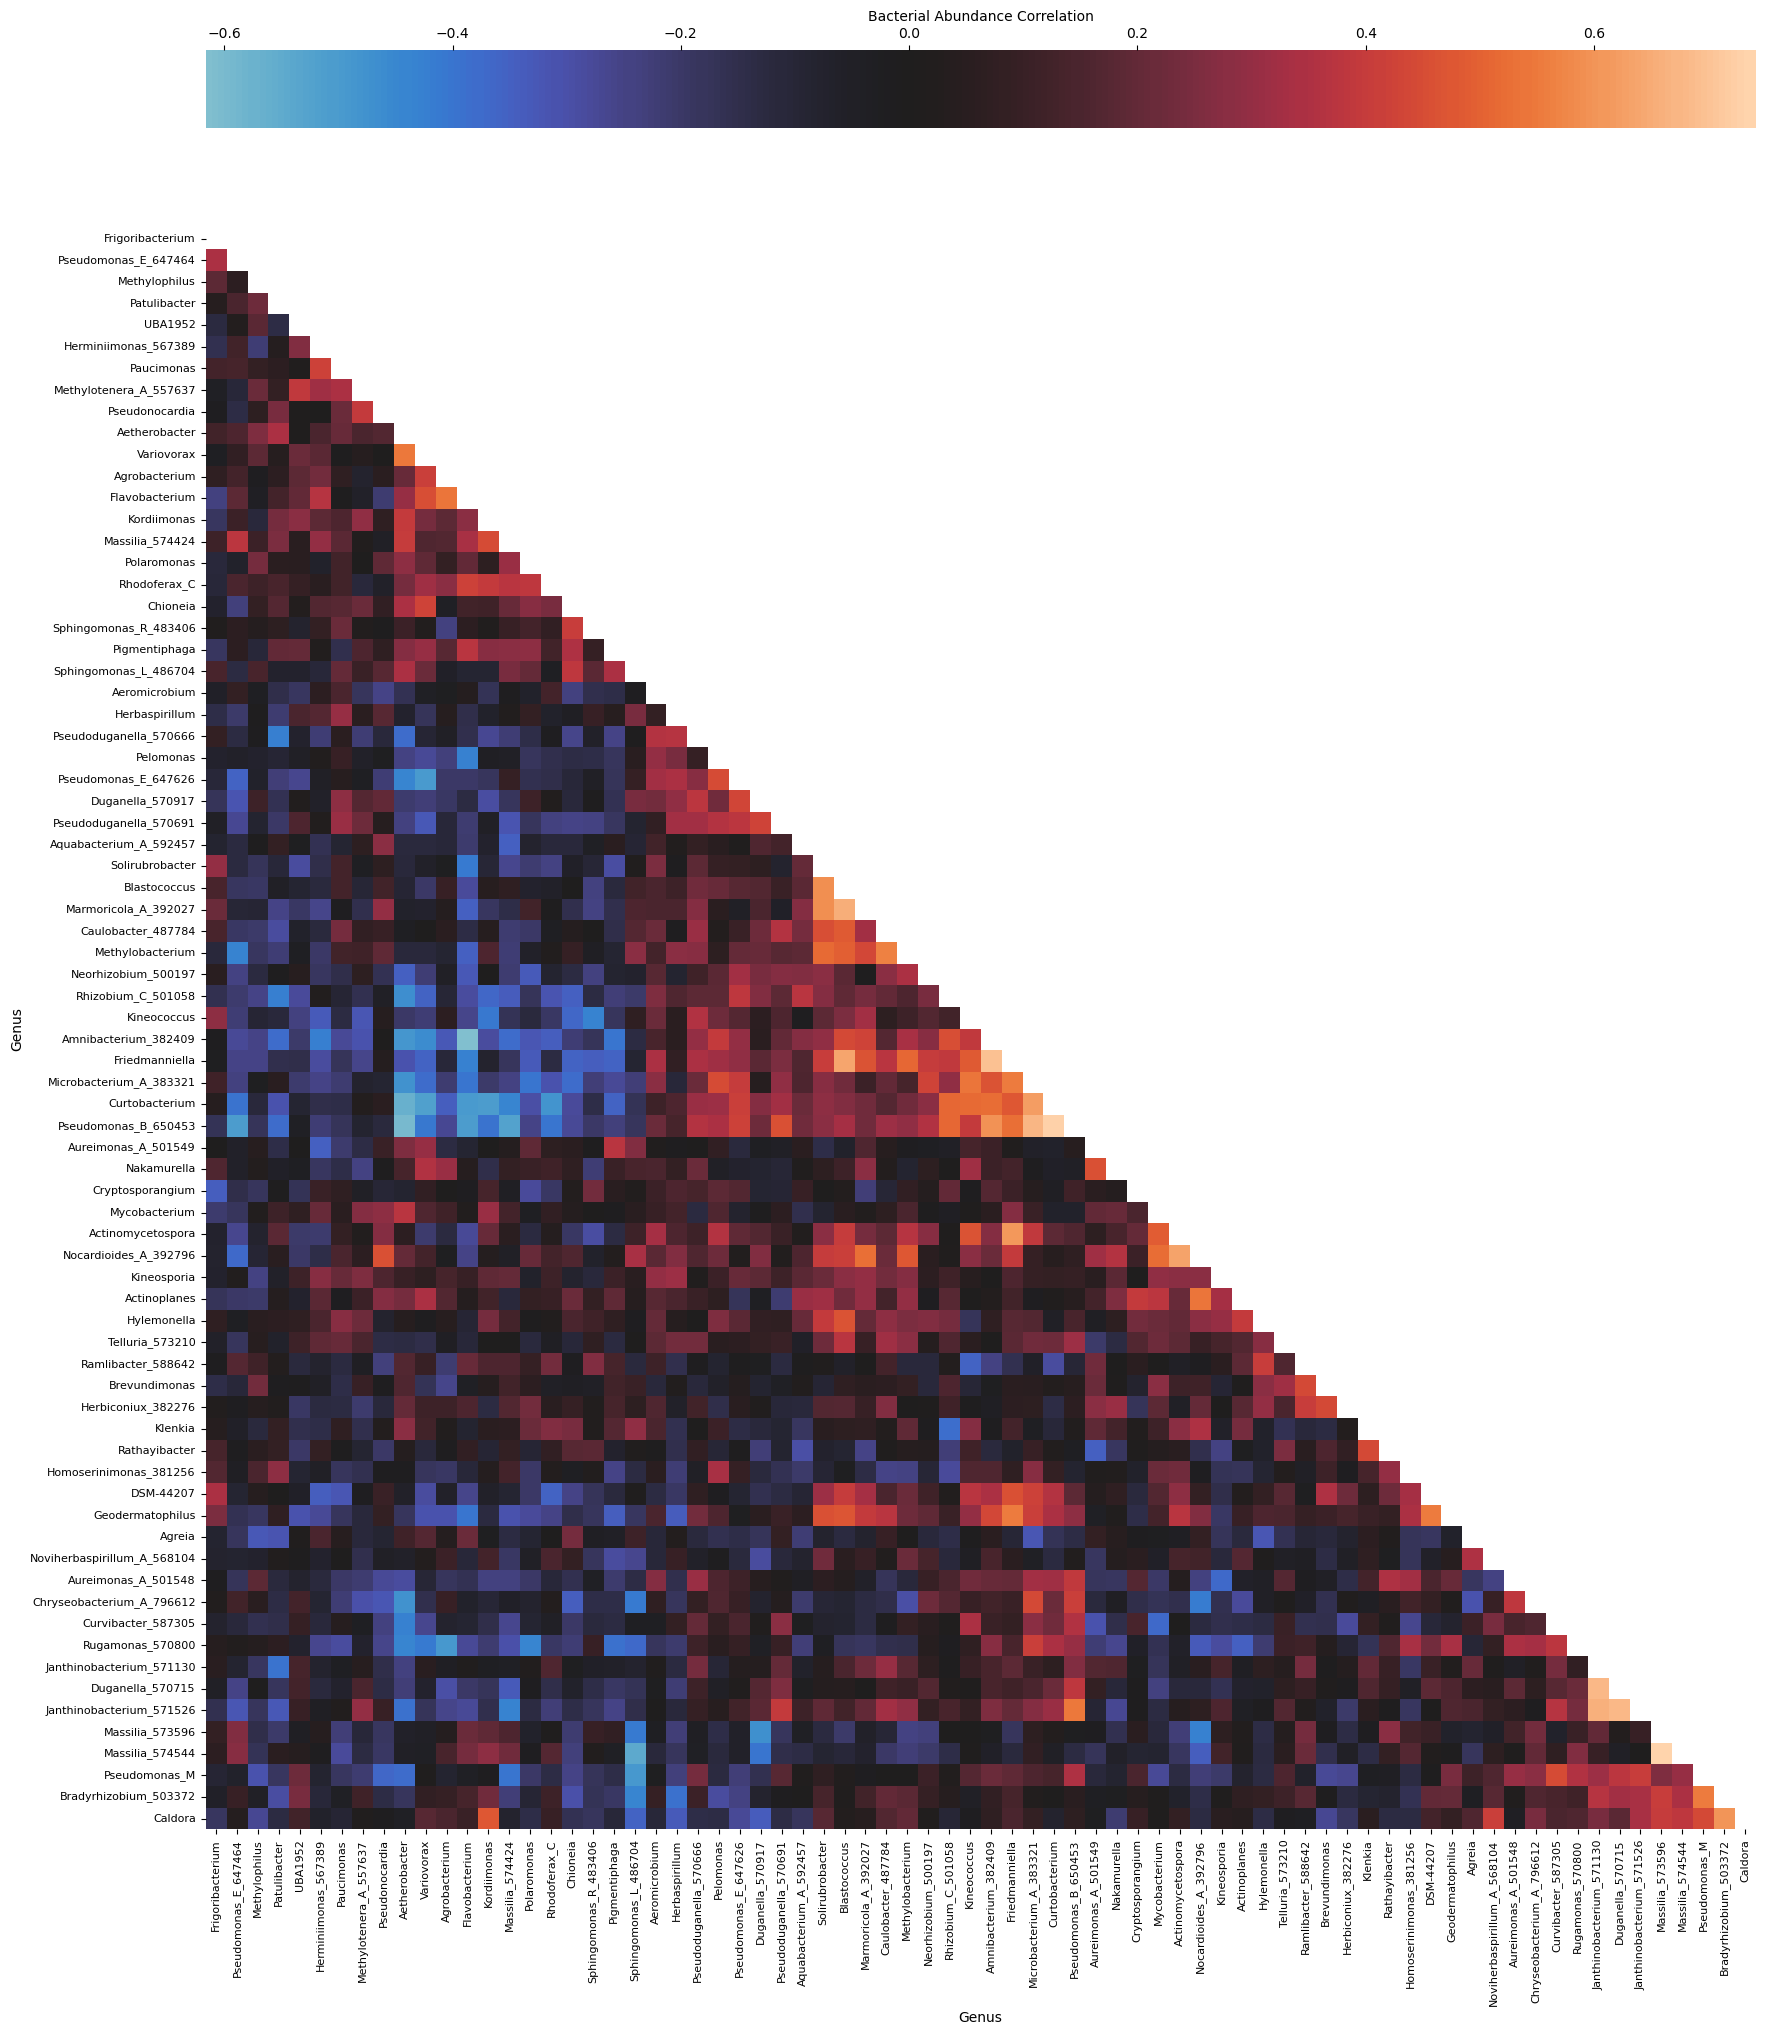

In [18]:
matrix = np.triu(reorder_bacteria_correlation)
fig, ax = plt.subplots(figsize=(20,26))
sns.heatmap(data = reorder_bacteria_correlation,cmap = 'icefire',center = 0, cbar_kws={'label': 'Bacterial Abundance Correlation','location':'top',}, mask = matrix)
ax.tick_params(axis='x', labelsize = 8)
ax.tick_params(axis='y', labelsize = 8)
plt.savefig('/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/Figs/bacterial_heatmap_abundance_only_all_genus_icefire_and_bottom_half.pdf')


/var/folders/nk/6xkk9sgn1pz4ff1b36sfq3y40000gt/T/ipykernel_43372/651402543.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5, 50.5, 52.5, 54.5, 56.5, 58.5, 60.5]),
 [Text(0, 0.5, 'Actinomycetospora'),
  Text(0, 2.5, 'Aeromicrobium'),
  Text(0, 4.5, 'Agrobacterium'),
  Text(0, 6.5, 'Aquabacterium_A_592457'),
  Text(0, 8.5, 'Blastococcus'),
  Text(0, 10.5, 'Brevundimonas'),
  Text(0, 12.5, 'Chioneia'),
  Text(0, 14.5, 'Curtobacterium'),
  Text(0, 16.5, 'Duganella_570715'),
  Text(0, 18.5, 'Friedmanniella'),
  Text(0, 20.5, 'Geodermatophilus'),
  Text(0, 22.5, 'Herbiconiux_382276'),
  Text(0, 24.5, 'Hylemonella'),
  Text(0, 26.5, 'Janthinobacterium_571526'),
  Text(0, 28.5, 'Kineosporia'),
  Text(0, 30.5, 'Kordiimonas'),
  Text(0, 32.5, 'Massilia_573596'),
  Text(0, 34.5, 'Massilia_574544'),
  Text(0, 36.5, 'Methylophilus'),
  Text(0, 38.5, 'Mycobacterium'),
  Text(0, 40.5, 'Neorhizobium_500197'),
  Text(0, 42.5, 'Noviherbaspirillum_A_568104

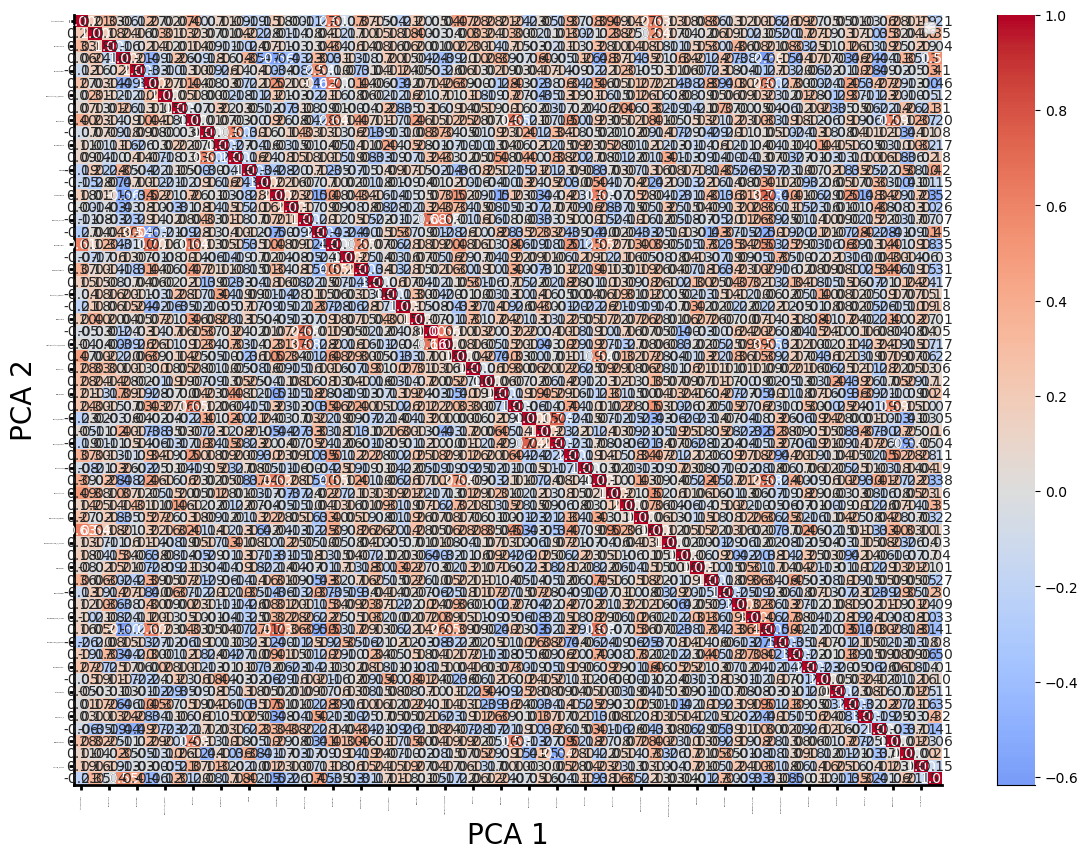

In [19]:
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor("white")
ax = sns.heatmap(data = timepoint_abundance_matrix.corr(method="spearman"), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.xlabel("PCA 1", fontsize=20)
plt.ylabel("PCA 2", fontsize=20)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=0, rotation=90)
plt.yticks(fontsize=0)
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line], 
#      full_meta_data['plate.pos'][line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

# plt.ylim(0,10)